<a href="https://colab.research.google.com/github/kjedrzejczak/Wprowadzenie_do_sieci_neuronowych-Tensorflow_2.0-Keras/blob/main/Tensorboard_dev_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

np.set_printoptions(precision=12, suppress=True, linewidth=120)

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [4]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 18

In [ ]:
print(f'X_train[0] shape: {X_train[0].shape}')

In [5]:
X_train = X_train / 255.
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

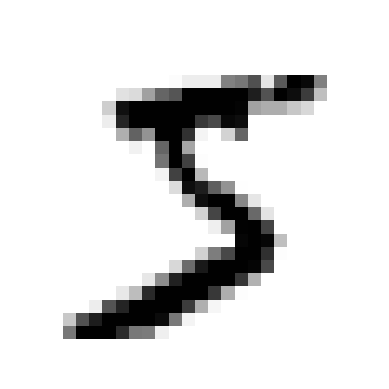

In [6]:
plt.imshow(X_train[0], cmap='gray_r')
plt.axis('off')

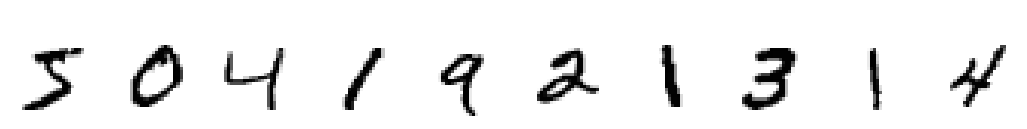

In [7]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i-1], cmap='gray_r')
    plt.title(y_train[i-1], color='white', fontsize=16)
plt.show()

# Budowanie modelu

In [9]:
def build_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=10, activation='softmax'))

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return model

model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model - Tensorboard

In [10]:
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime as dt

!rm -rf ./logs
log_dir = 'logs/fit/' + dt.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir=log_dir)

In [11]:
model = build_model()
history = model.fit(X_train, y_train, epochs=8, validation_split=0.2, batch_size=32, callbacks=[tensorboard])

Epoch 1/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3274 - accuracy: 0.9051 - val_loss: 0.1652 - val_accuracy: 0.9525
Epoch 2/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1591 - accuracy: 0.9532 - val_loss: 0.1189 - val_accuracy: 0.9632
Epoch 3/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1203 - accuracy: 0.9637 - val_loss: 0.1024 - val_accuracy: 0.9697
Epoch 4/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0958 - accuracy: 0.9704 - val_loss: 0.0944 - val_accuracy: 0.9710
Epoch 5/8
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0814 - accuracy: 0.9745 - val_loss: 0.0865 - val_accuracy: 0.9745
Epoch 6/8
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0711 - accuracy: 0.9776 - val_loss: 0.0805 - val_accuracy: 0.9751
Epoch 7/8
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0629 - accuracy: 0.9799 - val_loss: 0.0850 - val_accuracy: 0.9757

In [ ]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

# Tensorboard Dev

In [12]:
%load_ext tensorboard

In [13]:
!tensorboard dev upload --logdir logs

2024-06-24 15:11:26.396815: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-24 15:11:26.396888: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-24 15:11:26.398753: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-24 15:11:27.621602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
****************************************************************
****************************************************************
****************************************************************

Uploading TensorBoard logs to https://tensorb